# Optimization, Newton Methods, & Profit Maximization

### Import relevant packages

In [1]:
import sympy as sm
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation

from optimization import newton_method, gradient_descent, constrained_newton_method


## Part 1: Basic Optimization Theory

### Gradient Descent

In [2]:
## Gradient Descent Visualization

x  = sm.symbols('x')

function = 3*x**2 + 2*x - 24

symbols = [x]
x0 = {x:3}

GD_values = gradient_descent(function,symbols,x0,iterations=20)

Starting Values: [3]
Step 1: [1.]
Step 2: [0.2]
Step 3: [-0.12]
Step 4: [-0.248]
Step 5: [-0.2992]
Step 6: [-0.31968]
Step 7: [-0.327872]
Step 8: [-0.3311488]
Step 9: [-0.33245952]
Step 10: [-0.33298381]
Step 11: [-0.33319352]
Step 12: [-0.33327741]
Step 13: [-0.33331096]
Step 14: [-0.33332439]
Step 15: [-0.33332975]
Step 16: [-0.3333319]

Convergence Achieved (17 iterations): Solution = {x: -0.3333327606710272}


### Newton Method

In [6]:
## Optimization

x, y  = sm.symbols('x y')

function = 100*(y-x**2)**2 + (1-x)**2

symbols = [x,y]
x0 = {x:-1.2,y:1}

NM_values = newton_method(function,symbols,x0,iterations=20)

Starting Values: [-1.2  1. ]
Step 1: [-1.1752809   1.38067416]
Step 2: [ 0.76311487 -3.17503385]
Step 3: [0.76342968 0.58282478]
Step 4: [0.99999531 0.94402732]
Step 5: [0.9999957  0.99999139]
Step 6: [1. 1.]

Convergence Achieved (7 iterations): Solution = {x: 1.0, y: 1.0}


## Part 2: Constrained Optimization Theory

### Lagrangian 

In [5]:
## Optimization

x, y, L  = sm.symbols('x y L')

Lagrangian = 100*(y-x**2)**2 + (1-x)**2 - L*(x**2-y-2)

Gamma = [x,y,L]
Gamma0 = {x:-1.2,y:1,L:1}

L_values = newton_method(Lagrangian,Gamma,Gamma0)

Starting Values: [-1.2  1.   1. ]
Step 1: [ -1.175  -0.62  400.   ]
Step 2: [  0.75833333  -5.16270833 400.        ]
Step 3: [  0.75865618  -1.42444091 400.        ]
Step 4: [  0.99999497  -1.05825447 400.        ]
Step 5: [  0.99999537  -1.00000927 400.        ]
Step 6: [  1.  -1. 400.]

Convergence Achieved (7 iterations): Solution = {x: 1.0, y: -1.0, L: 400.0}


### Logarithmic Barrier Function

In [4]:
## Optimization

x, y, rho = sm.symbols('x y rho')

function = 100*(y-x**2)**2 + (1-x)**2 + rho*sm.log((-x)*(y-3))

# Function requires last symbol to be rho!
symbols = [x,y,rho]
x0 = {x:-15,y:15,rho:10}

barrier_values = constrained_newton_method(function,symbols,x0,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [-15  15]
Convergence Achieved (110 iterations): Solution = {x: -1.1233787862281797, y: 1.291240896118275}

Step 2 w/ {rho: 9.0}
Starting Values: [-1.12337879  1.2912409 ]
Convergence Achieved (3 iterations): Solution = {x: -1.1373300506617396, y: 1.3203103068312028}

Step 3 w/ {rho: 8.1}
Starting Values: [-1.13733005  1.32031031]
Convergence Achieved (3 iterations): Solution = {x: -1.1524403005117094, y: 1.3527043975425512}

Step 4 w/ {rho: 7.29}
Starting Values: [-1.1524403  1.3527044]
Convergence Achieved (3 iterations): Solution = {x: -1.1687524046555116, y: 1.3886022975549375}

Step 5 w/ {rho: 6.561}
Starting Values: [-1.1687524  1.3886023]
Convergence Achieved (3 iterations): Solution = {x: -1.1862878521765035, y: 1.428149169242245}

Step 6 w/ {rho: 5.9049000000000005}
Starting Values: [-1.18628785  1.42814917]
Convergence Achieved (3 iterations): Solution = {x: -1.2050406618819274, y: 1.4714382120658847}

Step 7 w/ {rho: 5.3144100000000005}
S

### Putting them together

In [3]:
## Optimization

x, y, L, rho = sm.symbols('x y L rho')

function = 100*(y-x**2)**2 + (1-x)**2 + L*(x**2-y-2) - rho*sm.log((-x)*(y-3))

# Function requires last symbol to be rho!
symbols = [x,y,L,rho]
x0 = {x:-15,y:15,L:0,rho:10}

combined_values = constrained_newton_method(function,symbols,x0,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [-15  15   0]
Convergence Achieved (15 iterations): Solution = {x: -3.9631764104337135, y: 13.706767260218255, L: -400.93398873413037}

Step 2 w/ {rho: 9.0}
Starting Values: [  -3.96317641   13.70676726 -400.93398873]
Convergence Achieved (5 iterations): Solution = {x: -3.802167311247783, y: 12.456476262721091, L: -400.951728714794}

Step 3 w/ {rho: 8.1}
Starting Values: [  -3.80216731   12.45647626 -400.95172871]
Convergence Achieved (5 iterations): Solution = {x: -3.6534890867704632, y: 11.347982507150826, L: -400.97029431878434}

Step 4 w/ {rho: 7.29}
Starting Values: [  -3.65348909   11.34798251 -400.97029432]
Convergence Achieved (5 iterations): Solution = {x: -3.5166013015724937, y: 10.366484714221338, L: -400.9896172031588}

Step 5 w/ {rho: 6.561}
Starting Values: [  -3.5166013    10.36648471 -400.9896172 ]
Convergence Achieved (5 iterations): Solution = {x: -3.3909548710786486, y: 9.498574937692009, L: -401.0096059617542}

Step 6 w/ {rho: 5.

## Part 3: Econometric Profit Maximization

In [58]:
df = pd.DataFrame()
n = 50

# Covariates
df['price_competitor1'] = np.random.normal(loc=50,scale=5,size=n).round()
df['price_competitor2'] = np.random.normal(loc=35,scale=5,size=n).round()
df['price_complement'] = np.random.normal(loc=15,scale=4,size=n).round()
df['advertising'] = np.random.normal(loc=10000,scale=2500,size=n).round()
df['price'] = np.random.normal(loc=45,scale=5,size=n).round()
df['advertising_lag1'] = df['advertising'].shift(1)
df['price_lag1'] = df['price'].shift(1)

# Quantity
df['quantity_demanded'] = (10000
                            +75*df['price_competitor1']
                            +50*df['price_competitor2']
                            -20*df['price_complement']
                            +0.001*df['advertising_lag1']
                            -25*df['price_lag1']+
                            -50*df['price']
                            -2*df['price']**2
                            +0.00001*df['advertising']
                            +0.000001*df['advertising']**2
                            + np.random.normal(0,100,size=n) # Error
                            ).round()


In [1]:
price, advertising  = sm.symbols('price advertising')

price_competitor1 = 50
price_competitor2 = 35
price_complement = 15
advertising_lag = 1000
price_lag = 45


quantity = (10000 
            +75*price_competitor1
            +50*price_competitor2
            -20*price_complement
            +0.001*advertising_lag
            -25*price_lag
            -75*price
            -5*price**2
            +advertising
            -0.00001*advertising**2)

prod_cost = 40 - 0.001*quantity
profit = price * quantity - quantity * prod_cost - advertising


symbols = [price, advertising]
x0 = {price:50, advertising:30000}

values = newton_method(profit,symbols,x0,iterations=20)

NameError: name 'sm' is not defined

In [113]:
print(profit)

-advertising + price*(-1.0e-5*advertising**2 + advertising - 5*price**2 - 75*price + 14076.0) - (-1.0e-5*advertising**2 + advertising - 5*price**2 - 75*price + 14076.0)*(1.0e-8*advertising**2 - 0.001*advertising + 0.005*price**2 + 0.075*price + 25.924)


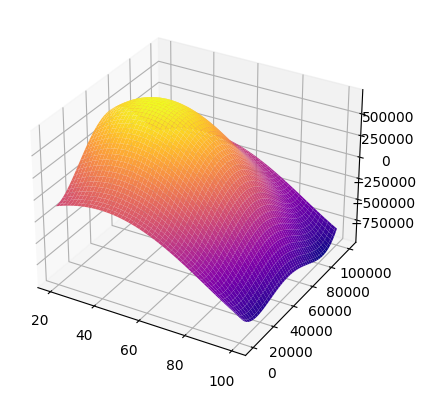

In [116]:
## Plot

# Defining surface and axes
price = np.outer(np.linspace(20, 100, 100), np.ones(100))
advertising = np.outer(np.linspace(0, 100000, 100), np.ones(100)).T

quantity = 10000 - 75*price
profit = 

fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(price, advertising, profit, cmap ='plasma')

plt.show()

# Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/profit.gif', dpi=100, writer='imagemagick')

In [68]:
price_competitor1 = 50
price_competitor2 = 35
price_complement = 15
advertising_lag = 1000
price_lag = 45

price = 61.03318773  
advertising = 37926.86026785

quantity = (10000 
            +75*price_competitor1
            +50*price_competitor2
            -20*price_complement
            +0.001*advertising_lag
            -25*price_lag
            -50*price
            -2*price**2
            +0.00001*advertising
            +0.000001*advertising**2)

prod_cost = 50 - 0.0005*quantity
profit = price * quantity - quantity * prod_cost - advertising


print(f"Quantity: {round(quantity,2)}")
print(f"Total Revenue: ${round(price*quantity,2)}")
print(f"Total Cost: ${round(quantity*prod_cost+advertising,2)}")
print(f"Profit: ${round(profit,2)}")

Quantity: 5013.07
Total Revenue: $305963.44
Total Cost: $276014.77
Profit: $29948.66


## Visuals Pt. 1

### Cover Photo

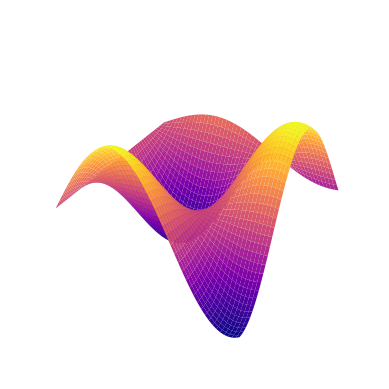

In [150]:
# Defining surface and axes
x = np.outer(np.linspace(0, 5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x)*np.cos(y)
 
# dpi=600,figsize=(10,10)
fig = plt.figure()
# fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.axis('off')
ax.grid(False)

plt.show()

In [ ]:
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/cover_rotation.gif', dpi=80, writer='imagemagick')

### Parabola Visual

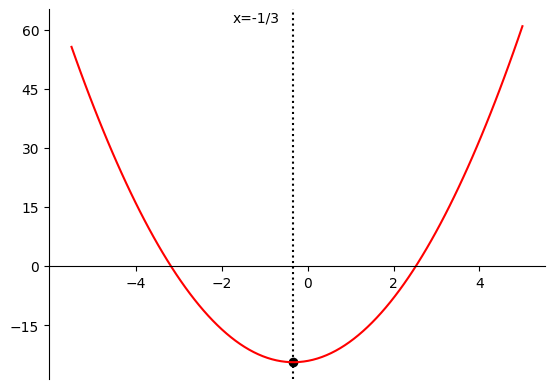

In [148]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.scatter(-1/3,  3*(-1/3)**2+2*(-1/3)-24, c='black')
plt.plot(x,y,'r')

# show the plot
plt.show()

### Gradient Descent Animation

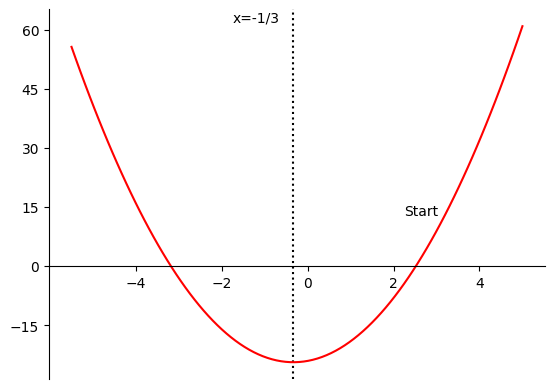

In [146]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre 
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.text(x=2.25,y=13,s="Start")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.plot(x,y,'r')

plt.show()

## Gradient Descent Animation

# x2=[]
# y2=[]

# def animate(iterations):
#     x2.append(float([v for v in GD_values[iterations].values()][0]))
#     y2.append(float(function.evalf(subs=GD_values[iterations])))
#     ax.scatter(x2, y2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(GD_values),interval=500)

# rot_animation.save('Images/gradient_descent.gif', dpi=600)

### Rosenbrock's Parabolic Valley

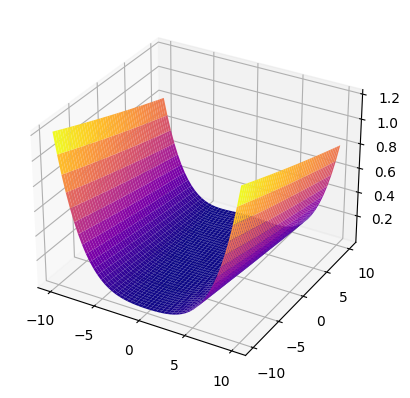

In [144]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.show()

# ## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/rotation.gif', dpi=100, writer='imagemagick')

### Newton Method Visualization

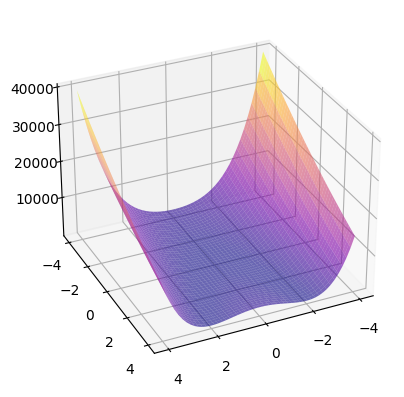

In [143]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-4, 4, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma',alpha=0.6)
ax.view_init(elev=30, azim=65)

plt.show()


# ## Newton Method Animation

# x2=[]
# y2=[]
# z2=[]

# def animate(iterations):

#     # Append & plot x and y values from optimization
#     x2.append(float([v for v in NM_values[iterations].values()][0]))
#     y2.append(float([v for v in NM_values[iterations].values()][1]))
#     z2.append(float(function.evalf(subs=NM_values[iterations])))
#     ax.scatter(x2, y2, z2, c='black')
#     ax.plot(x2, y2, z2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(NM_values),interval=1000)

# rot_animation.save('Images/newton_method2.gif', dpi=100)

## Visuals Pt. 2

### Equality Constrained Rosenbrock's Parabolic Valley

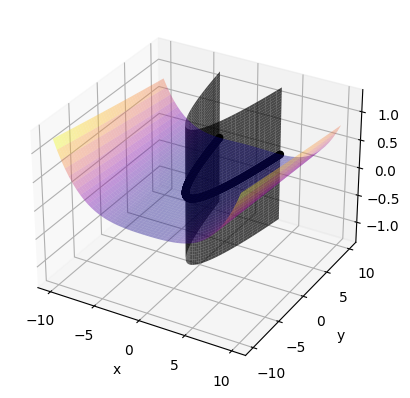

In [75]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraint
xs = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
zs = np.linspace(-1.2e6, 1.2e6, 500)
X, Z = np.meshgrid(xs, zs)
Y = X**2 - 2

# Constraint Intersection
X2 = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
Y2 = X2**2 - 2
Z2 = 100*(Y2-X2**2)**2 + (1-X2)**2

# 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X, Y, Z,color='black',alpha=0.7,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)
ax.scatter(X2, Y2, Z2,color='black',alpha=1,zorder=3)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/equality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Inequality Constrained Rosenbrock's Parabolic Valley

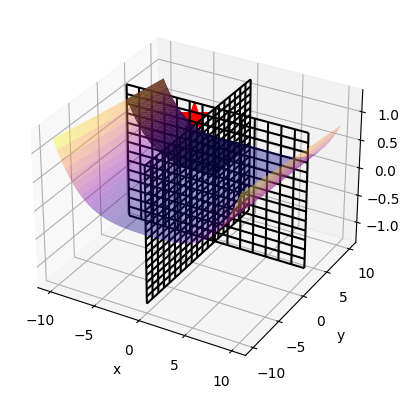

MovieWriter imagemagick unavailable; using Pillow instead.


In [74]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraints 

# y >= 3
xc1 = np.linspace(-10, 10, 15)
zc1 = np.linspace(-1.2e6, 1.2e6, 15)
XC1, ZC1 = np.meshgrid(xc1, zc1)
YC1 = 3

# x <= 0
yc2 = np.linspace(-10, 10, 20)
zc2 = np.linspace(-1.2e6, 1.2e6, 20)
YC2, ZC2 = np.meshgrid(yc2, zc2)
XC2 = 0


# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(XC1, YC1, ZC1,color='black',alpha=1,zorder=3)
ax.plot_wireframe(XC2, YC2, ZC2,color='black',alpha=1,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)

feasible_region_x = [-5]
feasible_region_y = [7.5]
feasible_region_z = [0.5e6]

ax.scatter(feasible_region_x, feasible_region_y, feasible_region_z, c='red',marker='*',s=500,zorder=4)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/inequality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Logarithmic Barrier Function Examples

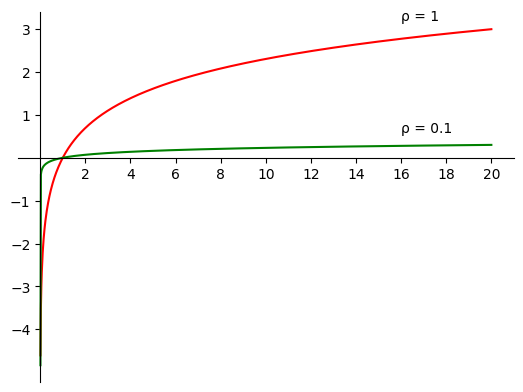

In [4]:
# Defining surface and axes
x = np.linspace(0.01, 20, 1000)
y = np.log(x)
x2 = np.linspace(0.000000000000000000001, 20, 1000)
y2 = 0.1*np.log(x2)

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_yticks([-4,-3,-2,-1,1,2,3])
ax.set_xticks([2,4,6,8,10,12,14,16,18,20])

ax.text(x=16,y=3.2,s="ρ = 1")
ax.text(x=16,y=0.6,s="ρ = 0.1")

# plot the function
plt.plot(x,y,'r')
plt.plot(x,y2,'g')

# show the plot
plt.show()